In [1]:
# importing necessary library for model building

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
%matplotlib inline
pd.set_option('display.max_columns', 500)

## Following steps are going to be followed 


----


<span style="color:purple">
    
- **Data Collection & Insight** : Gather necessary data, Understand the data.

- **Data Exploration and Preprocessing** : Explore dataset to understand its characteristics. Handle missing values, outliers, and perform any necessary preprocessing steps such as feature scaling or normalization. Split your data into training and testing sets.

-  **Feature Selection** : Identify the features that are most relevant to the problem. Remove any irrelevant or highly correlated features. Feature selection helps to improve model performance and interpretability.
    
-  **Model Building** : Build the logistic regression model using your training dataset. In logistic regression, the model estimates the probability of the positive class (1) given the values of the independent variables.

- **Model Training** : Use the training data to estimate the coefficients of the logistic regression model. 
    
- **Model Evaluation** :Evaluate the performance of your model using the testing dataset. Common evaluation metrics for binary classification problems include accuracy, precision, recall, F1 score, and the area under the Receiver Operating Characteristic (ROC) curve.
        
- **Model Interpretation** : Interpret the coefficients of the logistic regression model. Positive coefficients increase the log-odds of the event, while negative coefficients decrease the log-odds.

- **Hyperparameter Tuning** : Fine-tune the hyperparameters of your logistic regression model. This may include adjusting regularization parameters if regularization is applied.

- **Model Testing**: Use trained logistic regression model to make predictions on new, unseen data.

</span>


In [2]:
# import the data
lead_df = pd.read_csv('Leads.csv')

In [3]:
lead_df.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened


In [4]:
lead_df.shape

(9240, 37)

In [5]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Find out the features with duplicate values

# Create a new data frame
columns_with_dupes_df = pd.DataFrame(columns=['column name', 'has_duplicates'])

for column in lead_df.columns:
    has_duplicates = lead_df[column].duplicated().any()
    columns_with_dupes_df.loc[len(columns_with_dupes_df)] = [column, has_duplicates]

print(columns_with_dupes_df)


                                      column name  has_duplicates
0                                     Prospect ID           False
1                                     Lead Number           False
2                                     Lead Origin            True
3                                     Lead Source            True
4                                    Do Not Email            True
5                                     Do Not Call            True
6                                       Converted            True
7                                     TotalVisits            True
8                     Total Time Spent on Website            True
9                            Page Views Per Visit            True
10                                  Last Activity            True
11                                        Country            True
12                                 Specialization            True
13             How did you hear about X Education            True
14        

In [7]:
# Finding columns with null values with the proportion of null values in them
# Lets create a function to calculate null values

def null_values(DF):

    total_rows= len(DF)

    null_columns= DF.isnull().any()
    
    null_info= []

    for column in null_columns.index:
        null_count= DF[column].isnull().sum()
        null_percentage= (null_count/total_rows)*100

        if null_count > 0:
            null_info.append(f"Column {column}: has {null_percentage:.2f} % of null values")
    
    return null_info

In [8]:
null_values(lead_df)

['Column Lead Source: has 0.39 % of null values',
 'Column TotalVisits: has 1.48 % of null values',
 'Column Page Views Per Visit: has 1.48 % of null values',
 'Column Last Activity: has 1.11 % of null values',
 'Column Country: has 26.63 % of null values',
 'Column Specialization: has 15.56 % of null values',
 'Column How did you hear about X Education: has 23.89 % of null values',
 'Column What is your current occupation: has 29.11 % of null values',
 'Column What matters most to you in choosing a course: has 29.32 % of null values',
 'Column Tags: has 36.29 % of null values',
 'Column Lead Quality: has 51.59 % of null values',
 'Column Lead Profile: has 29.32 % of null values',
 'Column City: has 15.37 % of null values',
 'Column Asymmetrique Activity Index: has 45.65 % of null values',
 'Column Asymmetrique Profile Index: has 45.65 % of null values',
 'Column Asymmetrique Activity Score: has 45.65 % of null values',
 'Column Asymmetrique Profile Score: has 45.65 % of null values']

----
<span style="color:purple">

Above columns have null values. Some of the columns have significant number of null values and hence, it is important to understand the importance of such features for the proposed model.
    
Important factors to consider while handling null values-
    
- **Missing Completely At Randon(MCAR)** : probability of missingness is unrelated to both observed and unobserved data, alternatively it means the missingness is not influenced by any other variables
- **Missing At Random(MAR)** : missingness is related to other variables in the dataset, and the missing data mechanism can be modeled using observed data
- **Missing Not At Random** : this means that there's a systematic reason for the missing values that is not captured by the observed data.
    
More importantly, it is important to understand from the used case stand point which all features are useful vs which are not.  

</span>
----

In [9]:
# Import data dictionary

data_dictionary = pd.read_excel('Leads Data Dictionary.xlsx')

# Set display option to show full content of columns
pd.set_option('display.max_colwidth',None)

# Display the data frame
data_dictionary

,Variables,Description
0,Prospect ID,A unique ID with which the customer is identified.
1,Lead Number,A lead number assigned to each lead procured.
2,Lead Origin,"The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc."
3,Lead Source,"The source of the lead. Includes Google, Organic Search, Olark Chat, etc."
4,Do Not Email,An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
5,Do Not Call,An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
6,Converted,The target variable. Indicates whether a lead has been successfully converted or not.
7,TotalVisits,The total number of visits made by the customer on the website.
8,Total Time Spent on Website,The total time spent by the customer on the website.
9,Page Views Per Visit,Average number of pages on the website viewed during the visits.


In [10]:
# Lets understand the target variable
lead_df.Converted.value_counts()

Converted
0    5679
1    3561
Name: count, dtype: int64

In [11]:
# Converting the 0 & 1 in target variable to 'No' and 'Yes'

lead_df.Converted = lead_df.Converted.apply(lambda x: 'No' if x==0 else 'Yes')
lead_df.Converted.value_counts()

Converted
No     5679
Yes    3561
Name: count, dtype: int64

----
### Lets understand the types of null data present in Total Visits and page views per visit

----
<span style="color:purple">

An observation- both above mentioned columns have same number of records with null values. Which makes sense as if a custmer did not visit the site at all then page views per visit would not have any values.
    
"Column 'TotalVisits': 1.48% null values
Column 'Page Views Per Visit': 1.48% null values"
    
lets confirm the above asumption 

</span>



In [12]:
# Creating a datafram to store records where 
total_visits_null_df = lead_df[lead_df['TotalVisits'].notnull()]
# Check if there are any null values in "Page Views per Visit"
total_visits_null_df["Page Views Per Visit"].isnull().sum()

0

In [13]:
# Lets check what would be reminder of features with null values if we remove the 1.48% data
null_values(total_visits_null_df)

['Column Lead Source: has 0.32 % of null values',
 'Column Country: has 25.53 % of null values',
 'Column Specialization: has 15.72 % of null values',
 'Column How did you hear about X Education: has 24.17 % of null values',
 'Column What is your current occupation: has 29.47 % of null values',
 'Column What matters most to you in choosing a course: has 29.68 % of null values',
 'Column Tags: has 36.61 % of null values',
 'Column Lead Quality: has 51.95 % of null values',
 'Column Lead Profile: has 29.68 % of null values',
 'Column City: has 15.59 % of null values',
 'Column Asymmetrique Activity Index: has 45.79 % of null values',
 'Column Asymmetrique Profile Index: has 45.79 % of null values',
 'Column Asymmetrique Activity Score: has 45.79 % of null values',
 'Column Asymmetrique Profile Score: has 45.79 % of null values']

<Span style= "color:purple">
Removing null values in "ToalVisits" would take care of null values in feature Last Column- "Column Last Activity: has 1.11 % of null values".

    -----------------------------------   
    
Now lets understand the feature lead quality which has 51.95% null values
    
</span>

In [14]:
# Creating a function that would help in creating pivot of target feature and independent feature to usnderstand the data distribution

import pandas as pd

def analyze_feature_by_conversion(df, feature):
    pivot_table = df.groupby([feature, 'Converted']).size().unstack().fillna(0)
    pivot_table['Converted'] = pivot_table['Yes'] / (pivot_table['No'] + pivot_table['Yes'])
    return pivot_table



In [15]:
# creating a funtion that would help analyze the combination of features by ploting bar charts


def create_stacked_bar_chart(dataframe, index_col, columns_col, legend_labels):
    """
    Create a stacked bar chart based on specified columns.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        index_col (str): The column to be used as the index.
        columns_col (str): The column to be used as the columns.
        legend_labels (list): Labels for the legend.

    Returns:
        None (displays the plot)
    """
    pivot_table = dataframe.pivot_table(index=index_col, columns=columns_col,  aggfunc='size', fill_value=0)
    
    pivot_table.plot(kind='bar', stacked=True)
    
    plt.title(f'{index_col} Distribution by {columns_col}')
    plt.xlabel(index_col)
    plt.ylabel('Count')
    plt.legend(title=columns_col, loc='upper right', labels=legend_labels)
    
    plt.show()


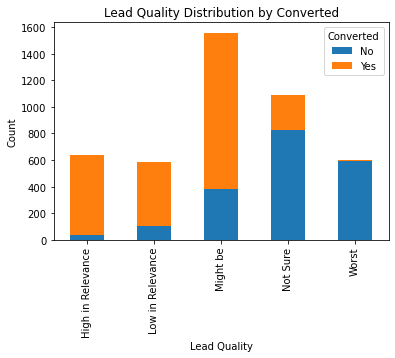

In [16]:
# Ploting Lead Quality and Converted features to understand the data better

create_stacked_bar_chart(lead_df, 'Lead Quality', 'Converted', ['No', 'Yes'])

<span style= 'color:purple'>
    
Based on the data dictionary, this feature indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead. Seems assigned employee's understanding of data and intution is prodocing good result. However, our job is to build a model that identifies/predicts better quality leads based on relevant features. Hence, we dont need "Lead Quality" column. This column will be removed
    
</span>


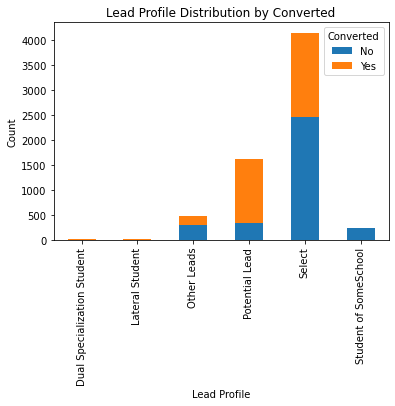

In [17]:
create_stacked_bar_chart(lead_df, 'Lead Profile', 'Converted', ['No', 'Yes'])

<span style= 'color:purple'>
    
Based on the data dictionary, this feature indicates "lead level assigned to each customer based on their profile". Given above data distribution against the targetvariable, feature "Lead Profile" does not play a significant role for model building.
    
---------- 
Similarly, lets analyse the rest of the features where null_values were observed.
    
</span>

In [18]:
print(round(lead_df['Tags'].isnull().sum()/len(lead_df)*100,2))

36.29


In [19]:
print(analyze_feature_by_conversion(lead_df, 'Tags'))

Converted                                              No     Yes  Converted
Tags                                                                        
Already a student                                   462.0     3.0   0.006452
Busy                                                 81.0   105.0   0.564516
Closed by Horizzon                                    2.0   356.0   0.994413
Diploma holder (Not Eligible)                        62.0     1.0   0.015873
Graduation in progress                              104.0     7.0   0.063063
In confusion whether part time or DLP                 4.0     1.0   0.200000
Interested  in full time MBA                        114.0     3.0   0.025641
Interested in Next batch                              0.0     5.0   1.000000
Interested in other courses                         500.0    13.0   0.025341
Lateral student                                       0.0     3.0   1.000000
Lost to EINS                                          4.0   171.0   0.977143

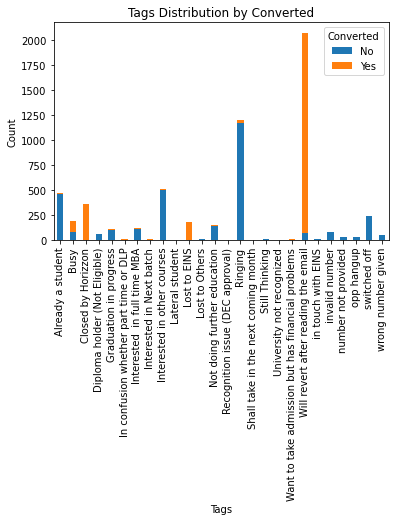

In [20]:
create_stacked_bar_chart(lead_df, 'Tags', 'Converted', ['No', 'Yes'])

In [21]:
print(analyze_feature_by_conversion(lead_df, 'Asymmetrique Activity Index'))

Converted                      No   Yes  Converted
Asymmetrique Activity Index                       
01.High                       576   245   0.298417
02.Medium                    2209  1630   0.424590
03.Low                        329    33   0.091160


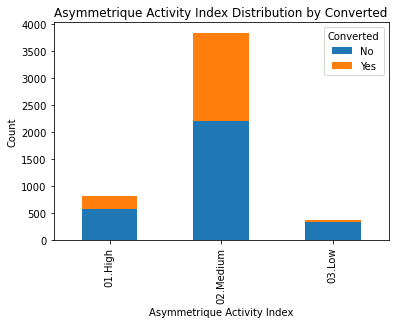

In [22]:
create_stacked_bar_chart(lead_df, 'Asymmetrique Activity Index', 'Converted', ['No', 'Yes'])

In [23]:
print(analyze_feature_by_conversion(lead_df, 'Asymmetrique Profile Index'))

Converted                     No   Yes  Converted
Asymmetrique Profile Index                       
01.High                     1158  1045   0.474353
02.Medium                   1940   848   0.304161
03.Low                        16    15   0.483871


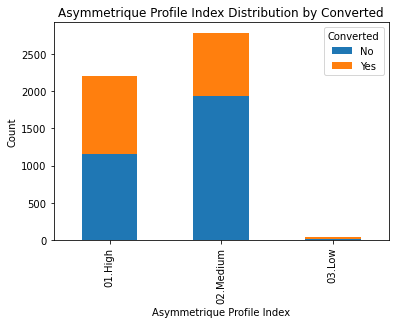

In [24]:
create_stacked_bar_chart(lead_df, 'Asymmetrique Profile Index', 'Converted', ['No', 'Yes'])

In [25]:
print(analyze_feature_by_conversion(lead_df, 'Asymmetrique Activity Score'))

Converted                        No    Yes  Converted
Asymmetrique Activity Score                          
7.0                             1.0    0.0   0.000000
8.0                             4.0    0.0   0.000000
9.0                             9.0    0.0   0.000000
10.0                           54.0    3.0   0.052632
11.0                           88.0    7.0   0.073684
12.0                          173.0   23.0   0.117347
13.0                          677.0   98.0   0.126452
14.0                         1061.0  710.0   0.400903
15.0                          471.0  822.0   0.635731
16.0                          239.0  228.0   0.488223
17.0                          332.0   17.0   0.048711
18.0                            5.0    0.0   0.000000


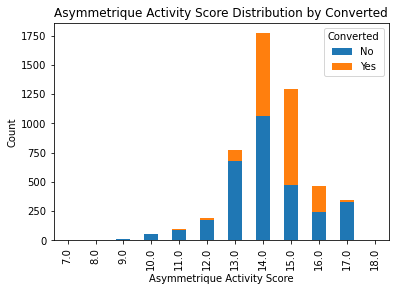

In [26]:
create_stacked_bar_chart(lead_df, 'Asymmetrique Activity Score', 'Converted', ['No', 'Yes'])

In [27]:
print(analyze_feature_by_conversion(lead_df, 'Asymmetrique Profile Score'))

Converted                     No  Yes  Converted
Asymmetrique Profile Score                      
11.0                           4    5   0.555556
12.0                          12   10   0.454545
13.0                         156   48   0.235294
14.0                         169   57   0.252212
15.0                        1259  500   0.284252
16.0                         356  243   0.405676
17.0                         317  262   0.452504
18.0                         688  383   0.357610
19.0                          63  182   0.742857
20.0                          90  218   0.707792


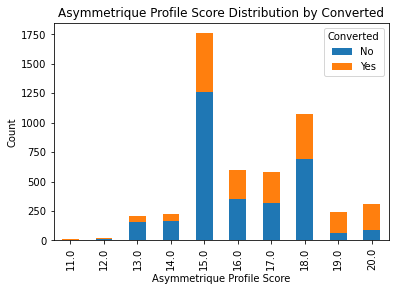

In [28]:
create_stacked_bar_chart(lead_df, 'Asymmetrique Profile Score', 'Converted', ['No', 'Yes'])

In [29]:
print(round(lead_df['Lead Source'].isnull().sum()/len(lead_df)*100,2))

0.39


In [30]:
print(analyze_feature_by_conversion(lead_df, 'Lead Source'))

Converted              No     Yes  Converted
Lead Source                                 
Click2call            1.0     3.0   0.750000
Direct Traffic     1725.0   818.0   0.321667
Facebook             42.0    13.0   0.236364
Google             1721.0  1147.0   0.399930
Live Chat             0.0     2.0   1.000000
NC_EDM                0.0     1.0   1.000000
Olark Chat         1307.0   448.0   0.255271
Organic Search      718.0   436.0   0.377816
Pay per Click Ads     1.0     0.0   0.000000
Press_Release         2.0     0.0   0.000000
Reference            44.0   490.0   0.917603
Referral Sites       94.0    31.0   0.248000
Social Media          1.0     1.0   0.500000
WeLearn               0.0     1.0   1.000000
Welingak Website      2.0   140.0   0.985915
bing                  5.0     1.0   0.166667
blog                  1.0     0.0   0.000000
google                5.0     0.0   0.000000
testone               1.0     0.0   0.000000
welearnblog_Home      1.0     0.0   0.000000
youtubecha

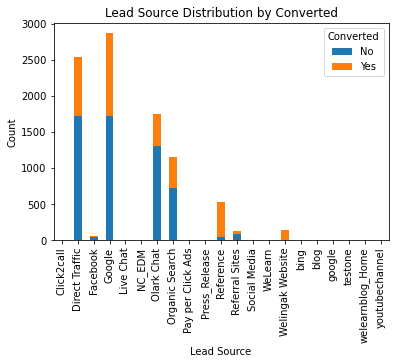

In [31]:
create_stacked_bar_chart(lead_df, 'Lead Source', 'Converted', ['No', 'Yes'])

In [32]:
print(round(lead_df['Country'].isnull().sum()/len(lead_df)*100,2))

26.63


In [33]:
print(analyze_feature_by_conversion(lead_df, 'Country'))

Converted                 No     Yes  Converted
Country                                        
Asia/Pacific Region      1.0     1.0   0.500000
Australia               10.0     3.0   0.230769
Bahrain                  3.0     4.0   0.571429
Bangladesh               1.0     1.0   0.500000
Belgium                  2.0     0.0   0.000000
Canada                   4.0     0.0   0.000000
China                    2.0     0.0   0.000000
Denmark                  0.0     1.0   1.000000
France                   3.0     3.0   0.500000
Germany                  3.0     1.0   0.250000
Ghana                    2.0     0.0   0.000000
Hong Kong                3.0     4.0   0.571429
India                 4091.0  2401.0   0.369840
Indonesia                1.0     0.0   0.000000
Italy                    2.0     0.0   0.000000
Kenya                    1.0     0.0   0.000000
Kuwait                   4.0     0.0   0.000000
Liberia                  1.0     0.0   0.000000
Malaysia                 1.0     0.0   0

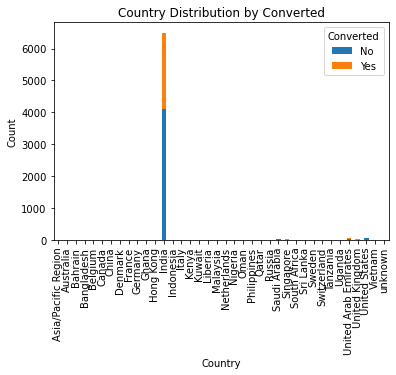

In [34]:
create_stacked_bar_chart(lead_df, 'Country', 'Converted', ['No', 'Yes'])

In [35]:
print(round(lead_df['Specialization'].isnull().sum()/len(lead_df)*100,2))

15.56


In [36]:
print(analyze_feature_by_conversion(lead_df, 'Specialization'))

Converted                            No  Yes  Converted
Specialization                                         
Banking, Investment And Insurance   171  167   0.494083
Business Administration             224  179   0.444169
E-Business                           36   21   0.368421
E-COMMERCE                           72   40   0.357143
Finance Management                  540  436   0.446721
Healthcare Management                80   79   0.496855
Hospitality Management               66   48   0.421053
Human Resource Management           460  388   0.457547
IT Projects Management              226  140   0.382514
International Business              114   64   0.359551
Marketing Management                430  408   0.486874
Media and Advertising               118   85   0.418719
Operations Management               265  238   0.473161
Retail Management                    66   34   0.340000
Rural and Agribusiness               42   31   0.424658
Select                             1124  818   0

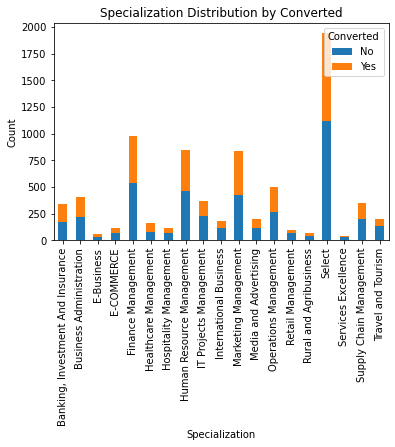

In [37]:
create_stacked_bar_chart(lead_df, 'Specialization', 'Converted', ['No', 'Yes'])

In [38]:
## total % of records with null values + unknown value
print("number of rows where customer has not provided value:" ,lead_df['Specialization'].isnull().sum() )
print("nuber of rows with null values:",lead_df['Specialization'].isnull().sum() )
print("% of rows with Select & Null_values:",((len(lead_df[lead_df['Specialization']=='Select']) + lead_df['Specialization'].isnull().sum())/len(lead_df))*100)

number of rows where customer has not provided value: 1438
nuber of rows with null values: 1438
% of rows with Select & Null_values: 36.58008658008658


In [39]:
print(round(lead_df['How did you hear about X Education'].isnull().sum()/len(lead_df)*100,2))

23.89


In [40]:
print(analyze_feature_by_conversion(lead_df, 'How did you hear about X Education'))

Converted                             No   Yes  Converted
How did you hear about X Education                       
Advertisements                        38    32   0.457143
Email                                 13    13   0.500000
Multiple Sources                      96    56   0.368421
Online Search                        465   343   0.424505
Other                                111    75   0.403226
SMS                                   18     5   0.217391
Select                              2612  2431   0.482054
Social Media                          39    28   0.417910
Student of SomeSchool                167   143   0.461290
Word Of Mouth                        196   152   0.436782


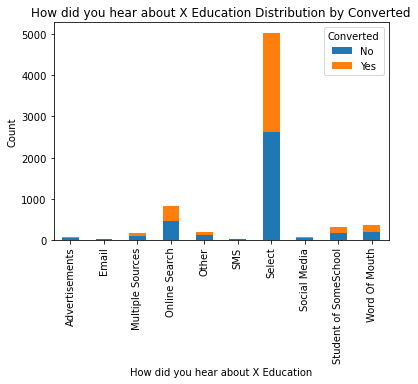

In [41]:
create_stacked_bar_chart(lead_df, 'How did you hear about X Education', 'Converted', ['No', 'Yes'])

In [42]:
print(round(lead_df['What is your current occupation'].isnull().sum()/len(lead_df)*100,2))

29.11


In [43]:
print(analyze_feature_by_conversion(lead_df, 'What is your current occupation'))

Converted                            No     Yes  Converted
What is your current occupation                           
Businessman                         3.0     5.0   0.625000
Housewife                           0.0    10.0   1.000000
Other                               6.0    10.0   0.625000
Student                           132.0    78.0   0.371429
Unemployed                       3159.0  2441.0   0.435893
Working Professional               59.0   647.0   0.916431


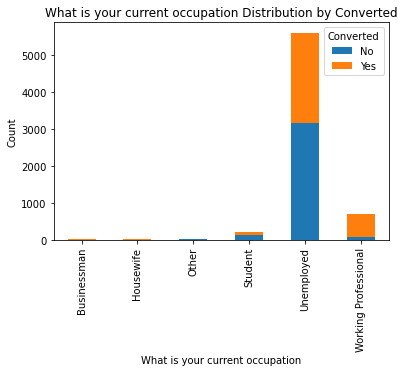

In [44]:
create_stacked_bar_chart(lead_df, 'What is your current occupation', 'Converted', ['No', 'Yes'])

In [45]:
print(analyze_feature_by_conversion(lead_df, 'What matters most to you in choosing a course'))

Converted                                          No     Yes  Converted
What matters most to you in choosing a course                           
Better Career Prospects                        3338.0  3190.0   0.488664
Flexibility & Convenience                         1.0     1.0   0.500000
Other                                             1.0     0.0   0.000000


In [46]:
print(round(lead_df['What matters most to you in choosing a course'].isnull().sum()/len(lead_df)*100,2))

29.32


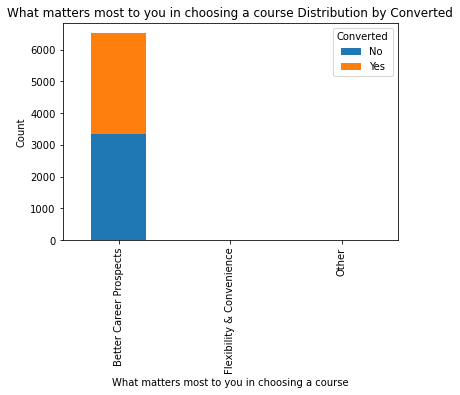

In [47]:
create_stacked_bar_chart(lead_df, 'What matters most to you in choosing a course', 'Converted', ['No', 'Yes'])

In [48]:
print(round(lead_df['Tags'].isnull().sum()/len(lead_df)*100,2))

36.29


In [49]:
print(analyze_feature_by_conversion(lead_df, 'Tags'))

Converted                                              No     Yes  Converted
Tags                                                                        
Already a student                                   462.0     3.0   0.006452
Busy                                                 81.0   105.0   0.564516
Closed by Horizzon                                    2.0   356.0   0.994413
Diploma holder (Not Eligible)                        62.0     1.0   0.015873
Graduation in progress                              104.0     7.0   0.063063
In confusion whether part time or DLP                 4.0     1.0   0.200000
Interested  in full time MBA                        114.0     3.0   0.025641
Interested in Next batch                              0.0     5.0   1.000000
Interested in other courses                         500.0    13.0   0.025341
Lateral student                                       0.0     3.0   1.000000
Lost to EINS                                          4.0   171.0   0.977143

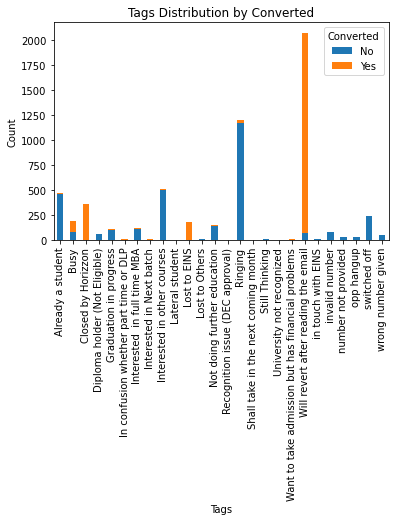

In [50]:
create_stacked_bar_chart(lead_df, 'Tags', 'Converted', ['No', 'Yes'])

In [51]:
print(round(lead_df['City'].isnull().sum()/len(lead_df)*100,2))

15.37


In [52]:
print(analyze_feature_by_conversion(lead_df, 'City'))

Converted                      No   Yes  Converted
City                                              
Mumbai                       1913  1309   0.406269
Other Cities                  410   276   0.402332
Other Cities of Maharashtra   256   201   0.439825
Other Metro Cities            225   155   0.407895
Select                       1146  1103   0.490440
Thane & Outskirts             414   338   0.449468
Tier II Cities                 49    25   0.337838


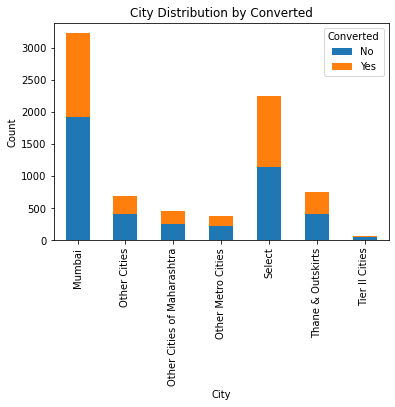

In [53]:
create_stacked_bar_chart(lead_df, 'City', 'Converted', ['No', 'Yes'])

In [54]:
null_values(lead_df)

['Column Lead Source: has 0.39 % of null values',
 'Column TotalVisits: has 1.48 % of null values',
 'Column Page Views Per Visit: has 1.48 % of null values',
 'Column Last Activity: has 1.11 % of null values',
 'Column Country: has 26.63 % of null values',
 'Column Specialization: has 15.56 % of null values',
 'Column How did you hear about X Education: has 23.89 % of null values',
 'Column What is your current occupation: has 29.11 % of null values',
 'Column What matters most to you in choosing a course: has 29.32 % of null values',
 'Column Tags: has 36.29 % of null values',
 'Column Lead Quality: has 51.59 % of null values',
 'Column Lead Profile: has 29.32 % of null values',
 'Column City: has 15.37 % of null values',
 'Column Asymmetrique Activity Index: has 45.65 % of null values',
 'Column Asymmetrique Profile Index: has 45.65 % of null values',
 'Column Asymmetrique Activity Score: has 45.65 % of null values',
 'Column Asymmetrique Profile Score: has 45.65 % of null values']

## Dropping columns 


-----
<span style= color:purple>

  
    
    - We will remove the columns/features with significant null values i.e above 45%. This will take out Lead Quality, Lead Profile, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score. As we reviewed above removal of these feature would not have impact on our model building. On the other hand, if we impute the records with null_values it would create biases in the data

    - We will drop Country, What matters most to you in choosing a course and What is your current occupation given the imbalance noticed in the data

    - We will remove tags as well from the data. Given this values under this feature attribute to subsequent process of taking action on potential leads, we wont have the data in real world scenario. Hence, traing and testing the data with this values may impact the overall performance of the model
    
  
    - Other than above columns, following cols can be dropped off due to their less relevance to the model building requirement.
                   'Search',
                   'Magazine',
                   'Newspaper Article',
                   'X Education Forums',
                   'Newspaper',
                   'Digital Advertisement',
                   'Through Recommendations',
                   'Receive More Updates About Our Courses',
                   'Update me on Supply Chain Content',
                   'Get updates on DM Content',
                   'I agree to pay the amount through cheque',
                   'A free copy of Mastering The Interview',
                   'Lead Number',
                   'Last Activity',
                   'Prospect ID',
                   'Last Notable Activity',
                   'Lead Profile',
                   'City',
                   'How did you hear about X Education'
    

--------------------------------------------------------------------------

In [55]:
lead_df['Last Activity'].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [56]:
lead_df['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

In [57]:
# creating the columns with null values to be dropped off 

drop_cols= ['Asymmetrique Activity Index',
                   'Asymmetrique Profile Index', 
                   'Asymmetrique Activity Score', 
                   'Asymmetrique Profile Score', 
                   'Lead Quality', 
                   'Country', 
                   'What matters most to you in choosing a course', 
                   'Tags',
                   'Search',
                   'Magazine',
                   'Newspaper Article',
                   'X Education Forums',
                   'Newspaper',
                   'Digital Advertisement',
                   'Through Recommendations',
                   'Receive More Updates About Our Courses',
                   'Update me on Supply Chain Content',
                   'Get updates on DM Content',
                   'I agree to pay the amount through cheque',
                   'A free copy of Mastering The Interview',
                   'Lead Number',
                   'Last Activity',
                   'Prospect ID',
                   'Last Notable Activity',
                   'Lead Profile',
                   'City',
                   'How did you hear about X Education']

In [58]:
# Dropping the above columns

lead_df.drop(columns=drop_cols, inplace=True)

In [59]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9240 non-null   object 
 1   Lead Source                      9204 non-null   object 
 2   Do Not Email                     9240 non-null   object 
 3   Do Not Call                      9240 non-null   object 
 4   Converted                        9240 non-null   object 
 5   TotalVisits                      9103 non-null   float64
 6   Total Time Spent on Website      9240 non-null   int64  
 7   Page Views Per Visit             9103 non-null   float64
 8   Specialization                   7802 non-null   object 
 9   What is your current occupation  6550 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 722.0+ KB


## Imputing data

Remaining columns/features with null values need to be imputed. Additionally, we have seen above that some of the columns are having value "Select" present in the data. This could have driven by the fact that the customer did not fill the form given these may not be madatory fields. Lets check the remaining coloumns with null values.

In [60]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9240 non-null   object 
 1   Lead Source                      9204 non-null   object 
 2   Do Not Email                     9240 non-null   object 
 3   Do Not Call                      9240 non-null   object 
 4   Converted                        9240 non-null   object 
 5   TotalVisits                      9103 non-null   float64
 6   Total Time Spent on Website      9240 non-null   int64  
 7   Page Views Per Visit             9103 non-null   float64
 8   Specialization                   7802 non-null   object 
 9   What is your current occupation  6550 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 722.0+ KB


In [61]:
null_values(lead_df)

['Column Lead Source: has 0.39 % of null values',
 'Column TotalVisits: has 1.48 % of null values',
 'Column Page Views Per Visit: has 1.48 % of null values',
 'Column Specialization: has 15.56 % of null values',
 'Column What is your current occupation: has 29.11 % of null values']

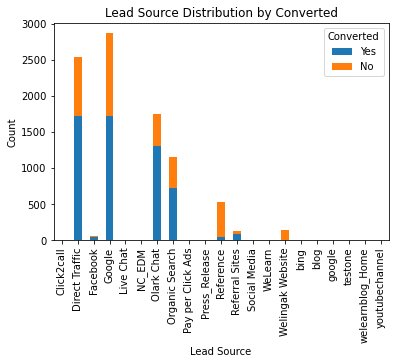

In [62]:
create_stacked_bar_chart(lead_df, "Lead Source", 'Converted', ['Yes','No'])

In [63]:
# will impute the null values with value 'Google'. Additionally, change the value 'google' to 'Google'

lead_df['Lead Source'] = lead_df['Lead Source'].map(lambda x: 'Google' if pd.isnull(x) or x.lower() == 'google' else x)


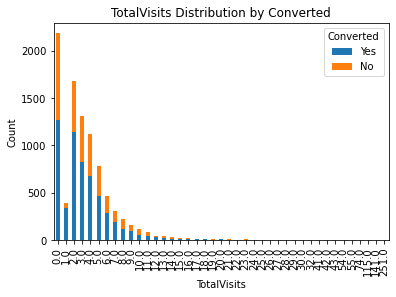

In [64]:
create_stacked_bar_chart(lead_df, "TotalVisits", 'Converted', ['Yes','No'])

In [65]:
# we will imput the null values with median

lead_df['TotalVisits']= lead_df['TotalVisits'].map(lambda x: lead_df['TotalVisits'].median() if pd.isnull(x) else x)


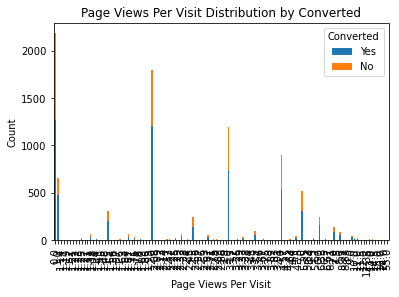

In [66]:
create_stacked_bar_chart(lead_df, "Page Views Per Visit", 'Converted', ['Yes','No'])

In [67]:
# we will imput the null values with median

lead_df['Page Views Per Visit']= lead_df['Page Views Per Visit'].map(lambda x: lead_df['Page Views Per Visit'].median() if pd.isnull(x) else x)


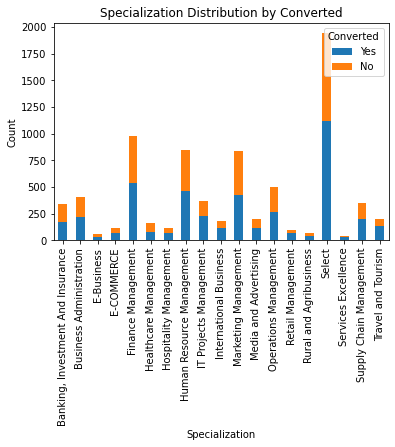

In [68]:
create_stacked_bar_chart(lead_df, "Specialization", 'Converted', ['Yes','No'])

In [69]:
# Imputing null values with a new category "Unknown", also have replaced value 'Select' with 'Unknown'

lead_df['Specialization']= lead_df['Specialization'].map(lambda x: "Unknown" if pd.isnull(x) or x == 'Select' else x )

In [70]:
# Imputing null values with "Unknown"

lead_df['What is your current occupation']= lead_df['What is your current occupation'].map(lambda x: "Unknown" if pd.isnull(x) else x)

In [71]:
lead_df.isnull().any()

Lead Origin                        False
Lead Source                        False
Do Not Email                       False
Do Not Call                        False
Converted                          False
TotalVisits                        False
Total Time Spent on Website        False
Page Views Per Visit               False
Specialization                     False
What is your current occupation    False
dtype: bool

### Above is our final columns to be considered for model building

-----

## Numerical Variable Analysis

In [72]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9240 non-null   object 
 1   Lead Source                      9240 non-null   object 
 2   Do Not Email                     9240 non-null   object 
 3   Do Not Call                      9240 non-null   object 
 4   Converted                        9240 non-null   object 
 5   TotalVisits                      9240 non-null   float64
 6   Total Time Spent on Website      9240 non-null   int64  
 7   Page Views Per Visit             9240 non-null   float64
 8   Specialization                   9240 non-null   object 
 9   What is your current occupation  9240 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 722.0+ KB


In [73]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation
0,API,Olark Chat,No,No,No,0.0,0,0.0,Unknown,Unemployed
1,API,Organic Search,No,No,No,5.0,674,2.5,Unknown,Unemployed
2,Landing Page Submission,Direct Traffic,No,No,Yes,2.0,1532,2.0,Business Administration,Student
3,Landing Page Submission,Direct Traffic,No,No,No,1.0,305,1.0,Media and Advertising,Unemployed
4,Landing Page Submission,Google,No,No,Yes,2.0,1428,1.0,Unknown,Unemployed


In [74]:
# Converting  the values in targetvariable to binary form i.e. 0 and 1

lead_df['Converted'] = lead_df['Converted'].map(lambda x: 0 if x == 'No' else '1').astype(int)
print(lead_df['Converted'].value_counts())


lead_df['Do Not Email'] = lead_df['Do Not Email'].map(lambda x: 0 if x == 'No' else '1').astype(int)
print(lead_df['Do Not Email'].value_counts())


lead_df['Do Not Call'] = lead_df['Do Not Call'].map(lambda x: 0 if x == 'No' else '1').astype(int)
print(lead_df['Do Not Call'].value_counts())

Converted
0    5679
1    3561
Name: count, dtype: int64
Do Not Email
0    8506
1     734
Name: count, dtype: int64
Do Not Call
0    9238
1       2
Name: count, dtype: int64


In [75]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9240 non-null   object 
 1   Lead Source                      9240 non-null   object 
 2   Do Not Email                     9240 non-null   int64  
 3   Do Not Call                      9240 non-null   int64  
 4   Converted                        9240 non-null   int64  
 5   TotalVisits                      9240 non-null   float64
 6   Total Time Spent on Website      9240 non-null   int64  
 7   Page Views Per Visit             9240 non-null   float64
 8   Specialization                   9240 non-null   object 
 9   What is your current occupation  9240 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 722.0+ KB


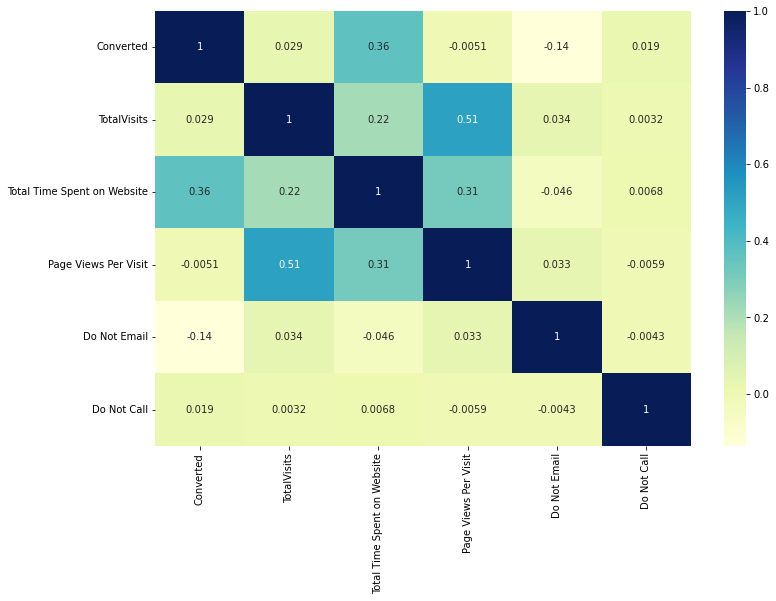

In [76]:
# Ploting heatmap to view correlation between numerical features

Num_cols = ['Converted',
           'TotalVisits',
           'Total Time Spent on Website',
           'Page Views Per Visit',
           'Do Not Email',
           'Do Not Call']

lead_df_numerical= lead_df[Num_cols]

plt.figure(figsize= (12,8))

sns.heatmap(lead_df_numerical.corr(), cmap= "YlGnBu", annot= True)

plt.show()

In [77]:
lead_df.describe()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.079437,0.000216,0.385390,3.438636,487.698268,2.357440
std,0.270435,0.014711,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,12.000000,1.000000
50%,0.000000,0.000000,0.000000,3.000000,248.000000,2.000000
75%,0.000000,0.000000,1.000000,5.000000,936.000000,3.000000
max,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000


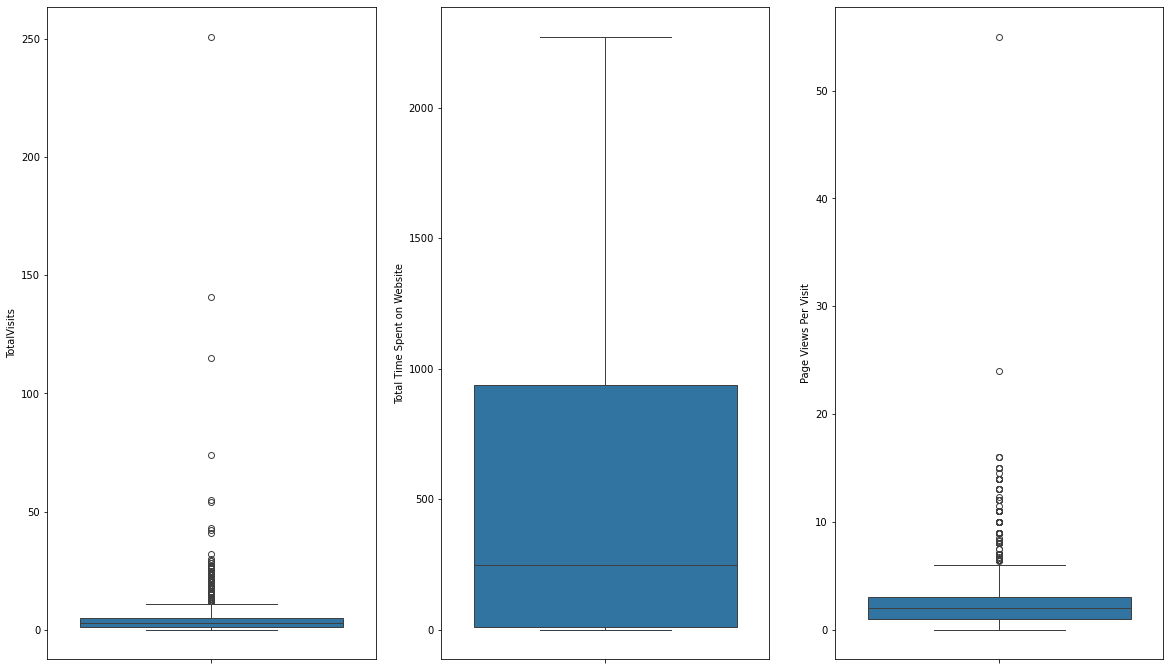

In [78]:
# plotting box plots to check outliers

plt.figure(figsize= (20,12))

#creating subplots
plt.subplot(1,3,1)
sns.boxplot(lead_df['TotalVisits'])

plt.subplot(1,3,2)
sns.boxplot(lead_df['Total Time Spent on Website'])

plt.subplot(1,3,3)
sns.boxplot(lead_df['Page Views Per Visit'])

plt.show()

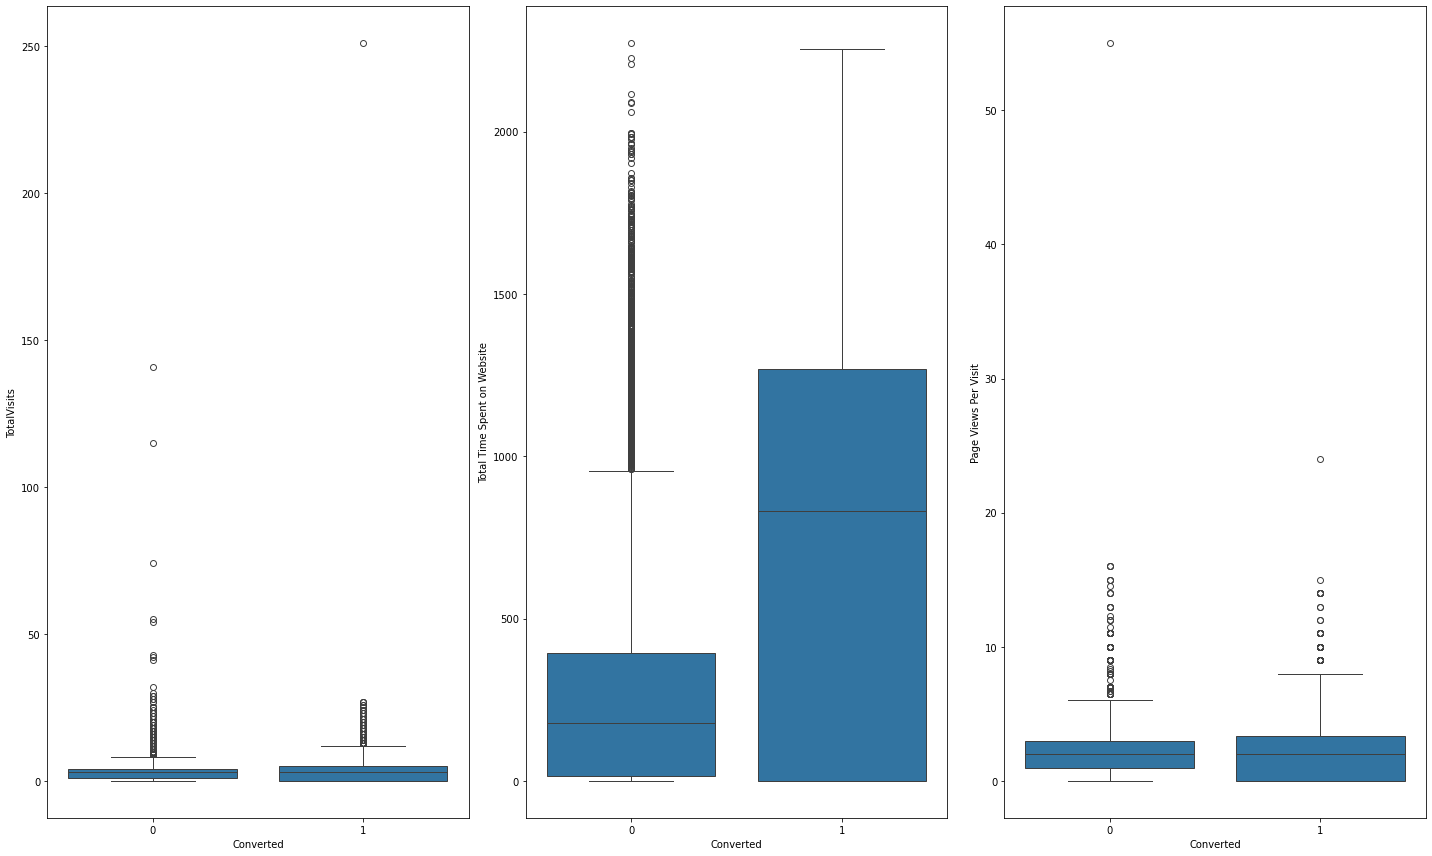

In [79]:
# plotting box plots to check outliers 


fig, axs = plt.subplots(1, 3, figsize=(20, 12))

sns.boxplot(y=lead_df['TotalVisits'], x=lead_df['Converted'], ax=axs[0])

sns.boxplot(y=lead_df['Total Time Spent on Website'], x=lead_df['Converted'], ax=axs[1])

sns.boxplot(y=lead_df['Page Views Per Visit'], x=lead_df['Converted'], ax=axs[2])

plt.tight_layout()

plt.show()

----

# Data Preparation 

----

In [80]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation
0,API,Olark Chat,0,0,0,0.0,0,0.0,Unknown,Unemployed
1,API,Organic Search,0,0,0,5.0,674,2.5,Unknown,Unemployed
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Business Administration,Student
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Media and Advertising,Unemployed
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Unknown,Unemployed


#### Creating dummies for categorical features

In [81]:
# List of categorical columns
categorical_cols = ['Lead Origin', 'Lead Source', 'Specialization', 'What is your current occupation']

# Creating dummy variables and dropping the first column
dummy_cols = pd.get_dummies(lead_df[categorical_cols], prefix= categorical_cols, drop_first=True)

# Convering dummy coloumns to integer
dummy_cols = dummy_cols.astype(int)

# Concatenate dummy columns with the original df
lead_df = pd.concat([lead_df, dummy_cols], axis=1)

# Dropping the original categorical columns
lead_df.drop(columns=categorical_cols, inplace=True)

lead_df.head()


,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,0,0,1,2.0,1532,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1.0,305,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,2.0,1428,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


----

## Test_Train Split

----

In [82]:
# importing relevant libraries 

from sklearn.model_selection import train_test_split

# creating X df by dropping target feature
X= lead_df.drop(columns='Converted', axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [83]:
# creating y df with target feature
y= lead_df['Converted']
y.shape

(9240,)

In [84]:
# Spliting data into test and train 

X_train, X_test, y_train, y_test= train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)

In [85]:
X_train

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional
1871,0,0,0.0,0,0.00,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6795,0,0,4.0,487,1.33,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3516,0,0,5.0,106,2.50,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
8105,0,0,5.0,1230,5.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3934,0,0,0.0,0,0.00,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0,0,0.0,0,0.00,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
79,0,0,3.0,705,2.00,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8039,0,0,0.0,0,0.00,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
6936,0,0,2.0,238,2.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [86]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6468 entries, 1871 to 5640
Data columns (total 52 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6468 non-null   int64  
 1   Do Not Call                                           6468 non-null   int64  
 2   TotalVisits                                           6468 non-null   float64
 3   Total Time Spent on Website                           6468 non-null   int64  
 4   Page Views Per Visit                                  6468 non-null   float64
 5   Lead Origin_Landing Page Submission                   6468 non-null   int64  
 6   Lead Origin_Lead Add Form                             6468 non-null   int64  
 7   Lead Origin_Lead Import                               6468 non-null   int64  
 8   Lead Origin_Quick Add Form                            6468 n

----

## Feature Scaling

----

In [87]:
# Importing relevant library
from sklearn.preprocessing import MinMaxScaler

# Initialize the min-max scaler
scaler = MinMaxScaler()

# Specify the columns to be scaled
columns_to_scale = ['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

# Applying min-max scaling directly to the specified columns in the DataFrame
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])


----

## Model Building

----

<span style= color:Blue>
Building the 1st Logisctic Regression model
</span>


In [88]:
# Importing the relevant model building library

import statsmodels.api as sm

# Adding a constant term to the independent variables
X_train_sm = sm.add_constant(X_train)

# Creating a logistic regression model using GLM
lgm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# Fitting the logistic regression model and displaying the summary
lgm1.fit().summary()



/Users/bhagabatiprasadmishra/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/bhagabatiprasadmishra/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1014: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
/Users/bhagabatiprasadmishra/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1014: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6416
Model Family:                Binomial   Df Model:                           51
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 15 Jan 2024   Deviance:                   1.6846e+05
Time:                        17:29:48   Pearson chi2:                 8.24e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                  1.38e+15   4.95e+07   2.79e+07      0.000    1.38e+15    1.38e+15
Do Not Email                                         -2.779e+14   3.18e+06  -8.73e+07      0.000   -2.78e+14   -2.78e+14
Do Not Call                                           1.322e+15   4.77e+07   2.77e+07      0.000    1.32e+15    1.32e+15
TotalVisits                                           3.895e+15   4.55e+07   8.57e+07      0.000     3.9e+15     3.9e+15
Total Time Spent on Website                           8.812e+14   3.92e+06   2.25e+08      0.000    8.81e+14    8.81e+14
Page Views Per Visit                                  4.353e+14   2.98e+07   1.46e+07      0.000    4.35e+14    4.35e+14
Lead Origin_Landing Page Submission                  -2.196e+14   3.34e+06  -6.58e+07      0.000    -2.2e+14    -2.2e+14
Lead Origin_Lead Add Form                             5.787e+14   1.29e+07   4.48e+07      0.000    5.79e+14    5.79e+14
Lead Origin_Lead Import                              -1.719e+13    4.8e+07  -3.58e+05      0.000   -1.72e+13   -1.72e+13
Lead Origin_Quick Add Form                            3.024e+15   6.77e+07   4.47e+07      0.000    3.02e+15    3.02e+15
Lead Source_Direct Traffic                            -1.99e+15    4.1e+07  -4.86e+07      0.000   -1.99e+15   -1.99e+15
Lead Source_Facebook                                 -5.129e+14    6.3e+07  -8.14e+06      0.000   -5.13e+14   -5.13e+14
Lead Source_Google                                   -9.951e+14   4.09e+07  -2.43e+07      0.000   -9.95e+14   -9.95e+14
Lead Source_Live Chat                                 3.829e+15   6.14e+07   6.24e+07      0.000    3.83e+15    3.83e+15
Lead Source_NC_EDM                                    4.774e+15   7.86e+07   6.07e+07      0.000    4.77e+15    4.77e+15
Lead Source_Olark Chat                               -1.545e+13    4.1e+07  -3.77e+05      0.000   -1.55e+13   -1.55e+13
Lead Source_Organic Search                           -1.441e+15    4.1e+07  -3.51e+07      0.000   -1.44e+15   -1.44e+15
Lead Source_Pay per Click Ads                        -5.234e+15   7.87e+07  -6.65e+07      0.000   -5.23e+15   -5.23e+15
Lead Source_Press_Release                            -5.077e+15   6.29e+07  -8.07e+07      0.000   -5.08e+15   -5.08e+15
Lead Source_Reference                                -7.619e+14    3.9e+07  -1.96e+07      0.000   -7.62e+14   -7.62e+14
Lead Source_Referral Sites                           -7.315e+14   4.15e+07  -1.76e+07      0.000   -7.32e+14   -7.32e+14
Lead Source_Social Media                             -1.186e+15   6.27e+07  -1.89e+07      0.000   -1.19e+15   -1.19e+15
Lead Source_WeLearn                                    3.5

----

#### Recursive Feature Selection

----

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

log_reg = LogisticRegression()

# running RFE with 15 variables 
rfe = RFE(log_reg, n_features_to_select= 15)

rfe= rfe.fit(X_train, y_train)

rfe.support_


/Users/bhagabatiprasadmishra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/bhagabatiprasadmishra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

array([ True, False,  True,  True, False,  True,  True, False, False,
       False,  True, False, False,  True,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True, False, False,  True,  True])

In [90]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 18),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 9),
 ('Lead Origin_Quick Add Form', False, 33),
 ('Lead Source_Direct Traffic', False, 7),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 12),
 ('Lead Source_Live Chat', False, 6),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 11),
 ('Lead Source_Pay per Click Ads', False, 14),
 ('Lead Source_Press_Release', False, 10),
 ('Lead Source_Reference', False, 31),
 ('Lead Source_Referral Sites', False, 2),
 ('Lead Source_Social Media', False, 35),
 ('Lead Source_WeLearn', False, 13),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 24),
 ('Lead Source_blog', False, 17),
 ('Lead Source_testone', Fa

----

<span style= color:Blue>
Building the 2nd Logisctic Regression model
</span>

----

In [91]:
# putting all 15 col in a new variable
column = X_train.columns[rfe.support_]

In [92]:
column

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Specialization_Hospitality Management',
       'Specialization_Unknown', 'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Unknown',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [93]:
# Selecting the above RFE "column" to the X_train data

X_train = X_train[column]

In [94]:
# Adding constant

X_train_sm1= sm.add_constant(X_train)

# Creating a logistic regression model using GLM
lgm2 = sm.GLM(y_train, X_train_sm1, family=sm.families.Binomial())


# Fitting the logistic regression model and displaying the summary
lgm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2853.2
Date:                Mon, 15 Jan 2024   Deviance:                       5706.3
Time:                        17:29:51   Pearson chi2:                 7.88e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3605
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9961      0.131     -7.580      0.000      -1.254      -0.739
Do Not Email                                            -1.3139      0.161     -8.172      0.000      -1.629      -0.999
TotalVisits                                              5.0341      1.779      2.830      0.005       1.547       8.521
Total Time Spent on Website                              4.4732      0.159     28.065      0.000       4.161       4.786
Lead Origin_Landing Page Submission                     -0.8314      0.123     -6.777      0.000      -1.072      -0.591
Lead Origin_Lead Add Form                                3.2150      0.202     15.885      0.000       2.818       3.612
Lead Source_Facebook                                    -0.4672      0.533     -0.877      0.380      -1.511       0.577
Lead Source_NC_EDM                                      23.6007   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                                   0.9501      0.117      8.104      0.000       0.720       1.180
Lead Source_Welingak Website                             2.5011      0.743      3.365      0.001       1.044       3.958
Specialization_Hospitality Management                   -0.9504      0.318     -2.988      0.003      -1.574      -0.327
Specialization_Unknown                                  -0.9048      0.118     -7.700      0.000      -1.135      -0.674
What is your current occupation_Housewife               22.3150   1.34e+04      0.002      0.999   -2.63e+04    2.63e+04
What is your current occupation_Other                   -0.9689      0.794     -1.220      0.223      -2.526       0.588
What is your current occupation_Unknown                 -1.1805      0.083    -14.139      0.000      -1.344      -1.017
What is your current occupation_Working Professional     2.4158      0.184     13.144      0.000       2.056       2.776
========================================================================================================================
"""

In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each variable in the logistic regression model
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

# Calculate VIF for the independent variables in X_train_sm1
vif_data = calculate_vif(X_train_sm1)

# Display the VIF values
print(vif_data)


                                                Variable        VIF
0                                                  const  16.365644
1                                           Do Not Email   1.020984
2                                            TotalVisits   1.149320
3                            Total Time Spent on Website   1.260976
4                    Lead Origin_Landing Page Submission   3.500671
5                              Lead Origin_Lead Add Form   1.836659
6                                   Lead Source_Facebook   1.024352
7                                     Lead Source_NC_EDM   1.000779
8                                 Lead Source_Olark Chat   1.856848
9                           Lead Source_Welingak Website   1.268849
10                 Specialization_Hospitality Management   1.009994
11                                Specialization_Unknown   2.990621
12             What is your current occupation_Housewife   1.005428
13                 What is your current occupati

----

<span style= color:Blue>

As observed above VIF looks good for the selected features. Lets target feature with high p value to be dropped off and re-build the model.

</span>

----

In [96]:
# will remove 'What is your current occupation_Housewife' given the high VIF

X_train.drop('What is your current occupation_Housewife',axis=1, inplace =True)

/var/folders/3l/9kl8zkgj3r39c4w7xzh_1_nh0000gn/T/ipykernel_4020/992209676.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop('What is your current occupation_Housewife',axis=1, inplace =True)


----

<span style= color:Blue>
Building the 3rd Logisctic Regression model
</span>

----

In [97]:
# Adding constant

X_train_sm2= sm.add_constant(X_train)

# Creating a logistic regression model using GLM
lgm3 = sm.GLM(y_train, X_train_sm2, family=sm.families.Binomial())


# Fitting the logistic regression model and displaying the summary
lgm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2858.1
Date:                Mon, 15 Jan 2024   Deviance:                       5716.1
Time:                        17:29:52   Pearson chi2:                 7.90e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3596
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9908      0.131     -7.543      0.000      -1.248      -0.733
Do Not Email                                            -1.3177      0.161     -8.197      0.000      -1.633      -1.003
TotalVisits                                              4.9675      1.775      2.799      0.005       1.489       8.446
Total Time Spent on Website                              4.4706      0.159     28.067      0.000       4.158       4.783
Lead Origin_Landing Page Submission                     -0.8282      0.123     -6.753      0.000      -1.069      -0.588
Lead Origin_Lead Add Form                                3.2222      0.202     15.934      0.000       2.826       3.619
Lead Source_Facebook                                    -0.4688      0.533     -0.880      0.379      -1.513       0.575
Lead Source_NC_EDM                                      21.5981   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Olark Chat                                   0.9488      0.117      8.094      0.000       0.719       1.179
Lead Source_Welingak Website                             2.4927      0.743      3.354      0.001       1.036       3.950
Specialization_Hospitality Management                   -0.9556      0.318     -3.004      0.003      -1.579      -0.332
Specialization_Unknown                                  -0.9080      0.117     -7.729      0.000      -1.138      -0.678
What is your current occupation_Other                   -0.9721      0.794     -1.224      0.221      -2.529       0.585
What is your current occupation_Unknown                 -1.1835      0.083    -14.179      0.000      -1.347      -1.020
What is your current occupation_Working Professional     2.4102      0.184     13.114      0.000       2.050       2.770
========================================================================================================================
"""

In [98]:
# claculating VIF 

# Calculate VIF for the independent variables in X_train_sm1
vif_data = calculate_vif(X_train_sm2)

# Display the VIF values
print(vif_data)

                                                Variable        VIF
0                                                  const  16.357734
1                                           Do Not Email   1.020874
2                                            TotalVisits   1.149240
3                            Total Time Spent on Website   1.260957
4                    Lead Origin_Landing Page Submission   3.500552
5                              Lead Origin_Lead Add Form   1.832570
6                                   Lead Source_Facebook   1.024351
7                                     Lead Source_NC_EDM   1.000779
8                                 Lead Source_Olark Chat   1.856843
9                           Lead Source_Welingak Website   1.268029
10                 Specialization_Hospitality Management   1.009931
11                                Specialization_Unknown   2.988852
12                 What is your current occupation_Other   1.002789
13               What is your current occupation

----

<span style= color:Blue>

Again, as observed above VIF looks good for the selected features. Lets target feature with high p value to be dropped off and re-build the model.

</span>

----

In [99]:
# will remove 'Lead Source_NC_EDM' given the high VIF

X_train.drop('Lead Source_NC_EDM',axis=1, inplace =True)

/var/folders/3l/9kl8zkgj3r39c4w7xzh_1_nh0000gn/T/ipykernel_4020/2260758596.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop('Lead Source_NC_EDM',axis=1, inplace =True)


----

<span style= color:Blue>
Building the 4th Logisctic Regression model
</span>

----

In [100]:
# Adding constant

X_train_sm3= sm.add_constant(X_train)

# Creating a logistic regression model using GLM
lgm4 = sm.GLM(y_train, X_train_sm3, family=sm.families.Binomial())


# Fitting the logistic regression model and displaying the summary
lgm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2859.4
Date:                Mon, 15 Jan 2024   Deviance:                       5718.8
Time:                        17:29:52   Pearson chi2:                 7.90e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3593
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9918      0.131     -7.551      0.000      -1.249      -0.734
Do Not Email                                            -1.3189      0.161     -8.204      0.000      -1.634      -1.004
TotalVisits                                              4.9860      1.776      2.808      0.005       1.505       8.467
Total Time Spent on Website                              4.4717      0.159     28.076      0.000       4.160       4.784
Lead Origin_Landing Page Submission                     -0.8271      0.123     -6.745      0.000      -1.067      -0.587
Lead Origin_Lead Add Form                                3.2238      0.202     15.941      0.000       2.827       3.620
Lead Source_Facebook                                    -0.4682      0.533     -0.879      0.379      -1.512       0.576
Lead Source_Olark Chat                                   0.9490      0.117      8.096      0.000       0.719       1.179
Lead Source_Welingak Website                             2.4932      0.743      3.354      0.001       1.036       3.950
Specialization_Hospitality Management                   -0.9569      0.318     -3.009      0.003      -1.580      -0.334
Specialization_Unknown                                  -0.9088      0.117     -7.736      0.000      -1.139      -0.679
What is your current occupation_Other                   -0.9728      0.794     -1.225      0.221      -2.529       0.584
What is your current occupation_Unknown                 -1.1794      0.083    -14.147      0.000      -1.343      -1.016
What is your current occupation_Working Professional     2.4099      0.184     13.112      0.000       2.050       2.770
========================================================================================================================
"""

In [101]:
# claculating VIF 

# Calculate VIF for the independent variables in X_train_sm1
vif_data = calculate_vif(X_train_sm3)

# Display the VIF values
print(vif_data)

                                                Variable        VIF
0                                                  const  16.357294
1                                           Do Not Email   1.020842
2                                            TotalVisits   1.149209
3                            Total Time Spent on Website   1.260845
4                    Lead Origin_Landing Page Submission   3.500474
5                              Lead Origin_Lead Add Form   1.832527
6                                   Lead Source_Facebook   1.024350
7                                 Lead Source_Olark Chat   1.856838
8                           Lead Source_Welingak Website   1.268029
9                  Specialization_Hospitality Management   1.009925
10                                Specialization_Unknown   2.988810
11                 What is your current occupation_Other   1.002789
12               What is your current occupation_Unknown   1.141651
13  What is your current occupation_Working Prof

----

<span style= color:Blue>

Again, as observed above VIF looks good for the selected features. Lets target feature with high p value to be dropped off and re-build the model.

</span>

----

In [102]:
# will remove 'Lead Source_Facebook' given the high VIF

X_train.drop('Lead Source_Facebook',axis=1, inplace =True)

/var/folders/3l/9kl8zkgj3r39c4w7xzh_1_nh0000gn/T/ipykernel_4020/962339966.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop('Lead Source_Facebook',axis=1, inplace =True)


----

<span style= color:Blue>
Building the 5th Logisctic Regression model
</span>

----

In [103]:
# Adding constant

X_train_sm4= sm.add_constant(X_train)

# Creating a logistic regression model using GLM
lgm5 = sm.GLM(y_train, X_train_sm4, family=sm.families.Binomial())


# Fitting the logistic regression model and displaying the summary
lgm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2859.8
Date:                Mon, 15 Jan 2024   Deviance:                       5719.6
Time:                        17:29:52   Pearson chi2:                 7.90e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3592
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0065      0.130     -7.727      0.000      -1.262      -0.751
Do Not Email                                            -1.3181      0.161     -8.197      0.000      -1.633      -1.003
TotalVisits                                              5.0413      1.778      2.835      0.005       1.556       8.527
Total Time Spent on Website                              4.4784      0.159     28.141      0.000       4.167       4.790
Lead Origin_Landing Page Submission                     -0.8158      0.122     -6.694      0.000      -1.055      -0.577
Lead Origin_Lead Add Form                                3.2368      0.202     16.045      0.000       2.841       3.632
Lead Source_Olark Chat                                   0.9610      0.117      8.246      0.000       0.733       1.189
Lead Source_Welingak Website                             2.4919      0.743      3.352      0.001       1.035       3.949
Specialization_Hospitality Management                   -0.9605      0.318     -3.024      0.002      -1.583      -0.338
Specialization_Unknown                                  -0.9060      0.117     -7.724      0.000      -1.136      -0.676
What is your current occupation_Other                   -0.9708      0.794     -1.223      0.221      -2.527       0.585
What is your current occupation_Unknown                 -1.1786      0.083    -14.136      0.000      -1.342      -1.015
What is your current occupation_Working Professional     2.4093      0.184     13.112      0.000       2.049       2.769
========================================================================================================================
"""

In [104]:
# claculating VIF 

# Calculate VIF for the independent variables in X_train_sm1
vif_data = calculate_vif(X_train_sm3)

# Display the VIF values
print(vif_data)

                                                Variable        VIF
0                                                  const  16.357294
1                                           Do Not Email   1.020842
2                                            TotalVisits   1.149209
3                            Total Time Spent on Website   1.260845
4                    Lead Origin_Landing Page Submission   3.500474
5                              Lead Origin_Lead Add Form   1.832527
6                                   Lead Source_Facebook   1.024350
7                                 Lead Source_Olark Chat   1.856838
8                           Lead Source_Welingak Website   1.268029
9                  Specialization_Hospitality Management   1.009925
10                                Specialization_Unknown   2.988810
11                 What is your current occupation_Other   1.002789
12               What is your current occupation_Unknown   1.141651
13  What is your current occupation_Working Prof

----

<span style= color:Blue>

Again, as observed above VIF looks good for the selected features. Lets target feature with high p value to be dropped off and re-build the model.

</span>

----

In [105]:
# will remove 'What is your current occupation_Other' given the high VIF

X_train.drop('What is your current occupation_Other',axis=1, inplace =True)

/var/folders/3l/9kl8zkgj3r39c4w7xzh_1_nh0000gn/T/ipykernel_4020/2440723369.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop('What is your current occupation_Other',axis=1, inplace =True)


----

<span style= color:Blue>
Building the 6th Logisctic Regression model
</span>

----

In [106]:
# Adding constant

X_train_sm5= sm.add_constant(X_train)

# Creating a logistic regression model using GLM
lgm6 = sm.GLM(y_train, X_train_sm5, family=sm.families.Binomial())


# Fitting the logistic regression model and displaying the summary
final_model= lgm6.fit()

final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2860.6
Date:                Mon, 15 Jan 2024   Deviance:                       5721.1
Time:                        17:29:52   Pearson chi2:                 7.90e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3591
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0092      0.130     -7.748      0.000      -1.264      -0.754
Do Not Email                                            -1.3217      0.161     -8.214      0.000      -1.637      -1.006
TotalVisits                                              4.9793      1.774      2.807      0.005       1.502       8.457
Total Time Spent on Website                              4.4720      0.159     28.132      0.000       4.160       4.784
Lead Origin_Landing Page Submission                     -0.8124      0.122     -6.665      0.000      -1.051      -0.574
Lead Origin_Lead Add Form                                3.2381      0.202     16.052      0.000       2.843       3.633
Lead Source_Olark Chat                                   0.9605      0.116      8.245      0.000       0.732       1.189
Lead Source_Welingak Website                             2.4912      0.743      3.351      0.001       1.034       3.948
Specialization_Hospitality Management                   -0.9573      0.318     -3.014      0.003      -1.580      -0.335
Specialization_Unknown                                  -0.9028      0.117     -7.698      0.000      -1.133      -0.673
What is your current occupation_Unknown                 -1.1763      0.083    -14.116      0.000      -1.340      -1.013
What is your current occupation_Working Professional     2.4117      0.184     13.127      0.000       2.052       2.772
========================================================================================================================
"""

In [107]:
# claculating VIF 

# Calculate VIF for the independent variables in X_train_sm1
vif_data = calculate_vif(X_train_sm5)

# Display the VIF values
print(vif_data)

                                                Variable        VIF
0                                                  const  16.124606
1                                           Do Not Email   1.020481
2                                            TotalVisits   1.147520
3                            Total Time Spent on Website   1.256222
4                    Lead Origin_Landing Page Submission   3.468839
5                              Lead Origin_Lead Add Form   1.818892
6                                 Lead Source_Olark Chat   1.829629
7                           Lead Source_Welingak Website   1.268021
8                  Specialization_Hospitality Management   1.009608
9                                 Specialization_Unknown   2.987685
10               What is your current occupation_Unknown   1.140633
11  What is your current occupation_Working Professional   1.149876


----

<span style= color:Blue>
Now, both p value and VIF looks fine.
</span>

----

## Creating Prediction

In [108]:

# Predicting probabilities on the training set
y_train_pred_probs = final_model.predict(X_train_sm5)

y_train_pred_probs[:15]

1871    0.487829
6795    0.156243
3516    0.344428
8105    0.667875
3934    0.278593
4844    0.974063
3297    0.180135
8071    0.995373
987     0.187815
7423    0.772773
1032    0.732583
6542    0.196631
4317    0.180917
6472    0.564068
712     0.168699
dtype: float64

In [109]:
# Replace 'Converted' with the actual column name 
y_train_actual = y_train  

# Creating a DataFrame with actual values and predicted probabilities
result_df = pd.DataFrame({'Converted': y_train_actual, 'Conversion_prob': y_train_pred_probs})

# Displaying the first few rows of the DataFrame
print(result_df.head())


      Converted  Conversion_prob
1871          0         0.487829
6795          0         0.156243
3516          0         0.344428
8105          0         0.667875
3934          0         0.278593


In [110]:
# Applying a threshold of 0.5 to convert probabilities into binary predictions
result_df['Predicted'] = (y_train_pred_probs >= 0.5).astype(int)

# Displaying the updated DataFrame
print(result_df.head())


      Converted  Conversion_prob  Predicted
1871          0         0.487829          0
6795          0         0.156243          0
3516          0         0.344428          0
8105          0         0.667875          1
3934          0         0.278593          0


-----

## Model Evaluation

----

<span style="color:purple">

Confusion Matrix:

A table showing the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).
    
</span>

In [111]:
# importing metrics from sklearn for evaluation

from sklearn import metrics

from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(result_df['Converted'], result_df['Predicted'])
print(confusion_mat)


[[3574  428]
 [ 853 1613]]


<span style="color:purple">

Accuracy:

The proportion of correctly classified instances.   
</span>

In [112]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(result_df['Converted'], result_df['Predicted'])
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.80


<span style= color:purple>
Precision, Recall, and F1-Score:


    Precision: The proportion of true positives among all predicted positives.

    Recall (Sensitivity): The proportion of true positives among all actual positives.

    F1-Score: The harmonic mean of precision and recall.
    
</span>

In [113]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(result_df['Converted'], result_df['Predicted'])
recall = recall_score(result_df['Converted'], result_df['Predicted'])
f1 = f1_score(result_df['Converted'], result_df['Predicted'])

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')


Precision: 0.79
Recall: 0.65
F1-Score: 0.72


<span style= color:purple>

Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC):

ROC curve plots the true positive rate against the false positive rate at various thresholds.
AUC measures the area under the ROC curve, providing a summary of the model's performance across various thresholds.
    
</span>

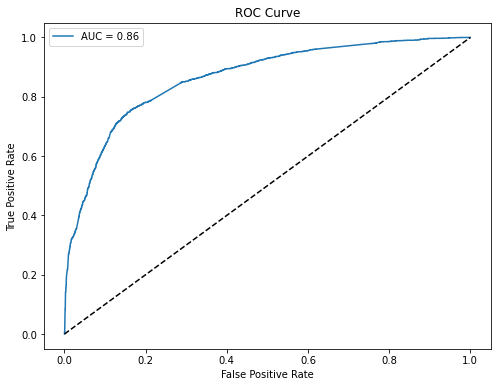

In [114]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(result_df['Converted'], y_train_pred_probs)
auc = roc_auc_score(result_df['Converted'], y_train_pred_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [115]:
# Creating predictions at different cutoffs
cutoffs = [0.3, 0.4, 0.5, 0.6, 0.7]  
result_df = pd.DataFrame({'Converted': y_train_actual})

for cutoff in cutoffs:
    result_df[f'Predicted_{cutoff}'] = (y_train_pred_probs >= cutoff).astype(int)


In [116]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

for cutoff in cutoffs:
    predicted_col = f'Predicted_{cutoff}'
    precision = precision_score(result_df['Converted'], result_df[predicted_col])
    recall = recall_score(result_df['Converted'], result_df[predicted_col])
    accuracy = accuracy_score(result_df['Converted'], result_df[predicted_col])

    print(f'Threshold: {cutoff:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'Accuracy: {accuracy:.2f}')
    print('-' * 30)


Threshold: 0.30
Precision: 0.71
Recall: 0.78
Accuracy: 0.79
------------------------------
Threshold: 0.40
Precision: 0.76
Recall: 0.72
Accuracy: 0.81
------------------------------
Threshold: 0.50
Precision: 0.79
Recall: 0.65
Accuracy: 0.80
------------------------------
Threshold: 0.60
Precision: 0.81
Recall: 0.58
Accuracy: 0.79
------------------------------
Threshold: 0.70
Precision: 0.84
Recall: 0.49
Accuracy: 0.77
------------------------------


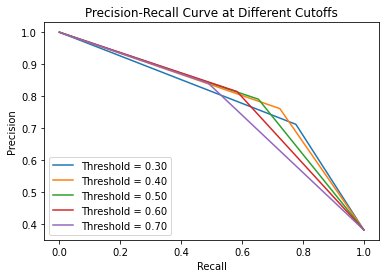

In [117]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

for cutoff in cutoffs:
    predicted_col = f'Predicted_{cutoff}'
    precision, recall, _ = precision_recall_curve(result_df['Converted'], result_df[predicted_col])

    plt.plot(recall, precision, label=f'Threshold = {cutoff:.2f}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve at Different Cutoffs')
plt.legend()
plt.show()


In [118]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Assuming 'Converted' is the name of the target variable column
result_df = pd.DataFrame({'Converted': y_train_actual})

# Define the probability thresholds
cutoffs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Create an empty list to store dictionaries
metrics_list = []

# Evaluate model performance at each cutoff
for cutoff in cutoffs:
    predicted_col = f'Predicted_{cutoff}'
    result_df[predicted_col] = (y_train_pred_probs >= cutoff).astype(int)

    precision = precision_score(result_df['Converted'], result_df[predicted_col])
    recall = recall_score(result_df['Converted'], result_df[predicted_col])
    accuracy = accuracy_score(result_df['Converted'], result_df[predicted_col])
    f1 = f1_score(result_df['Converted'], result_df[predicted_col])

    # Append metrics to the list as a dictionary
    metrics_list.append({'Threshold': cutoff, 'Precision': precision, 'Recall': recall, 'Accuracy': accuracy, 'F1': f1})

# Convert the list of dictionaries to a DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Display the DataFrame with metrics at different thresholds
print(metrics_df)


   Threshold  Precision    Recall  Accuracy        F1
0        0.1   0.443161  0.980130  0.522882  0.610354
1        0.2   0.566879  0.902271  0.699907  0.696292
2        0.3   0.711738  0.776967  0.794991  0.742924
3        0.4   0.760971  0.724250  0.808132  0.742157
4        0.5   0.790299  0.654096  0.801948  0.715775
5        0.6   0.814375  0.583536  0.790507  0.679896
6        0.7   0.840418  0.489051  0.769790  0.618303
7        0.8   0.887860  0.349959  0.735312  0.502036
8        0.9   0.944046  0.266829  0.714440  0.416061


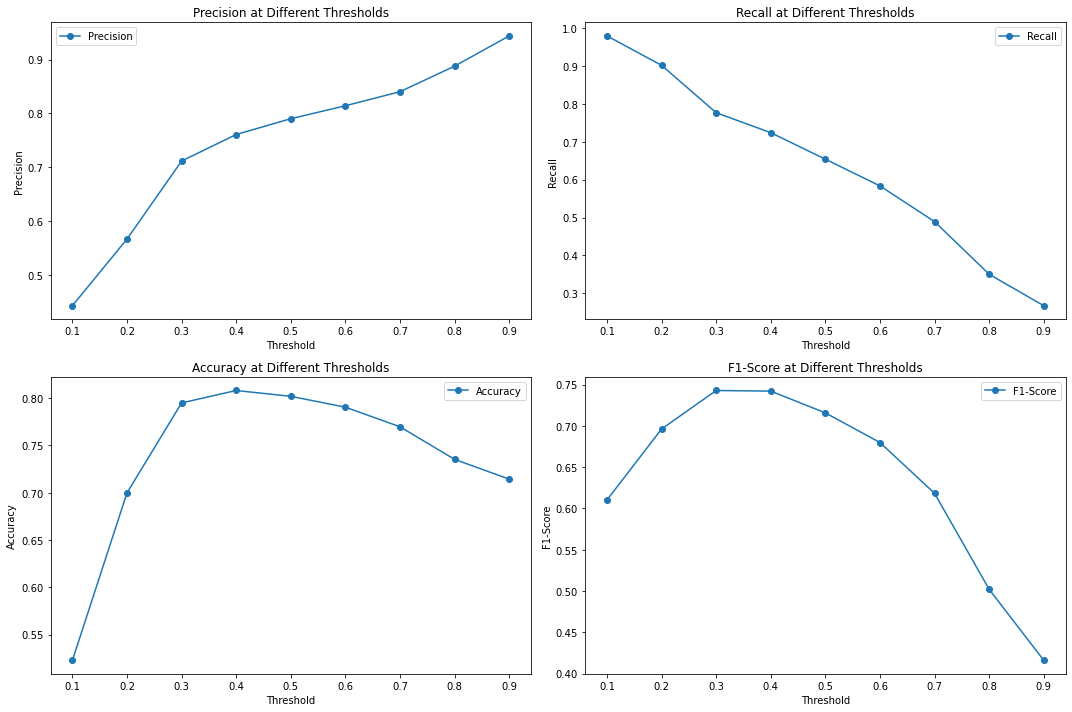

In [119]:
import matplotlib.pyplot as plt

# Assuming 'Threshold' is a column in your DataFrame
thresholds = metrics_df['Threshold'].values  # Convert to numpy array

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plotting Precision
axes[0, 0].plot(thresholds, metrics_df['Precision'].values, label='Precision', marker='o')
axes[0, 0].set_title('Precision at Different Thresholds')
axes[0, 0].set_xlabel('Threshold')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].legend()

# Plotting Recall
axes[0, 1].plot(thresholds, metrics_df['Recall'].values, label='Recall', marker='o')
axes[0, 1].set_title('Recall at Different Thresholds')
axes[0, 1].set_xlabel('Threshold')
axes[0, 1].set_ylabel('Recall')
axes[0, 1].legend()

# Plotting Accuracy
axes[1, 0].plot(thresholds, metrics_df['Accuracy'].values, label='Accuracy', marker='o')
axes[1, 0].set_title('Accuracy at Different Thresholds')
axes[1, 0].set_xlabel('Threshold')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].legend()

# Plotting F1-Score
axes[1, 1].plot(thresholds, metrics_df['F1'].values, label='F1-Score', marker='o')
axes[1, 1].set_title('F1-Score at Different Thresholds')
axes[1, 1].set_xlabel('Threshold')
axes[1, 1].set_ylabel('F1-Score')
axes[1, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


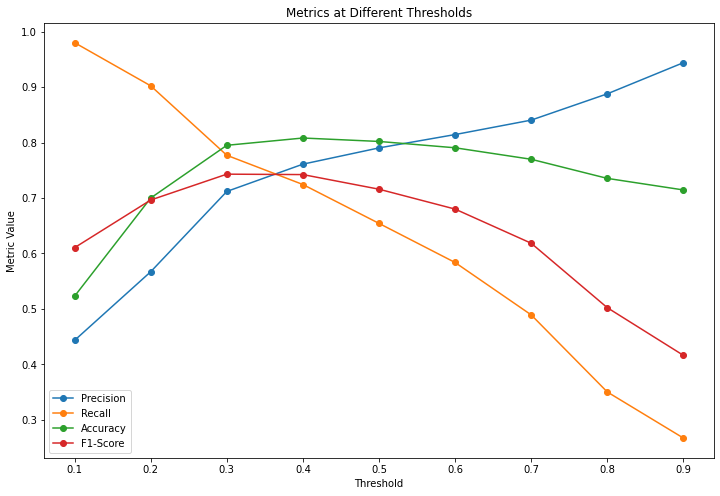

In [120]:
import matplotlib.pyplot as plt

thresholds = metrics_df['Threshold'].values  # Convert to numpy array

# Create a single plot for all curves
plt.figure(figsize=(12, 8))

# Plotting Precision
plt.plot(thresholds, metrics_df['Precision'].values, label='Precision', marker='o')

# Plotting Recall
plt.plot(thresholds, metrics_df['Recall'].values, label='Recall', marker='o')

# Plotting Accuracy
plt.plot(thresholds, metrics_df['Accuracy'].values, label='Accuracy', marker='o')

# Plotting F1-Score
plt.plot(thresholds, metrics_df['F1'].values, label='F1-Score', marker='o')

# Set plot labels and title
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('Metrics at Different Thresholds')
plt.legend()

# Show the plot
plt.show()


In [121]:
# 0.35 threshold appears appropriate given the above analysis.

# Applying a threshold of 0.35 to convert probabilities into binary predictions
result_df['Predicted'] = (y_train_pred_probs >= 0.35).astype(int)

# Calcualte Accuracy, Precision, Recall and F1 at 0.35 score
accuracy_train = accuracy_score(result_df['Converted'], result_df['Predicted'])
precision_train = precision_score(result_df['Converted'], result_df['Predicted'])
recall_train = recall_score(result_df['Converted'], result_df['Predicted'])
f1_train = f1_score(result_df['Converted'], result_df['Predicted'])

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Accuracy: 0.71
Precision: 0.94
Recall: 0.27
F1-Score: 0.42


## Prediction on test data

In [122]:
# Scaling

# Specify the columns to be scaled
columns_to_scale = ['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

# Applying min-max scaling directly to the specified columns in the DataFrame
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])


In [123]:


# Select the relevant columns from X_train_sm5
selected_columns = X_train.columns

# Use only the selected columns from X_test
X_test_selected = X_test[selected_columns]



In [124]:
# Adding constant to X_test_selected if needed
X_test_selected_sm = sm.add_constant(X_test[selected_columns])

# Predicting probabilities on the test set
y_test_pred_probs = final_model.predict(X_test_selected_sm)


In [125]:

# Replace 'Converted' with the actual column name 
y_test_actual = y_test  

# Creating a DataFrame with actual values and predicted probabilities
result_df_test = pd.DataFrame({'Converted': y_test_actual, 'Conversion_prob': y_test_pred_probs})

# Displaying the first few rows of the DataFrame
print(result_df_test.head())

      Converted  Conversion_prob
4269          1         0.280978
2376          1         0.790200
7766          1         0.834493
9199          0         0.278593
4359          1         0.902814


In [126]:
# Applying a threshold of 0.35 to convert probabilities into binary predictions
result_df_test['Predicted'] = (y_test_pred_probs >= 0.35).astype(int)

# Displaying the updated DataFrame
print(result_df_test.head())

      Converted  Conversion_prob  Predicted
4269          1         0.280978          0
2376          1         0.790200          1
7766          1         0.834493          1
9199          0         0.278593          0
4359          1         0.902814          1


In [127]:
# Calculating Accuracy, Precision, Recall and F1


accuracy_test = accuracy_score(result_df_test['Converted'], result_df_test['Predicted'])
precision_test = precision_score(result_df_test['Converted'], result_df_test['Predicted'])
recall_test = recall_score(result_df_test['Converted'], result_df_test['Predicted'])
f1_test = f1_score(result_df_test['Converted'], result_df_test['Predicted'])

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Accuracy: 0.71
Precision: 0.94
Recall: 0.27
F1-Score: 0.42
